<a href="https://colab.research.google.com/github/space4VV/LLM_trailblazr/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import urllib.request
if not os.path.exists("the_verdict.txt"):
  url = ("https://raw.githubusercontent.com/rasbt/"
           "LLMs-from-scratch/main/ch02/01_main-chapter-code/"
           "the-verdict.txt")
  file_path = "the_verdict.txt"

  urllib.request.urlretrieve(url,file_path)


In [3]:
with open("the_verdict.txt","r",encoding="utf-8") as f:
  r_text = f.read()

In [4]:
r_text[0:500]

'I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)\n\n"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it\''

In [5]:
#total no:characters
len(r_text)

20479

## Simple tokenizer

In [6]:
import re
# some random text
text = "Hello i am vishnu, and i am learning LLM!"
result = re.split(r'\s',text)
print(result)
# the pblm is here we are not splitting the punctuations

['Hello', 'i', 'am', 'vishnu,', 'and', 'i', 'am', 'learning', 'LLM!']


In [7]:
result = re.split(r'([,.]|\s)', text)
print(result)
# we have empty strings here

['Hello', ' ', 'i', ' ', 'am', ' ', 'vishnu', ',', '', ' ', 'and', ' ', 'i', ' ', 'am', ' ', 'learning', ' ', 'LLM!']


In [8]:
result= [tok for tok in result if tok.strip()]
print(result)

['Hello', 'i', 'am', 'vishnu', ',', 'and', 'i', 'am', 'learning', 'LLM!']


In [9]:
# nice lets add other punctuations too
def simple_tokenizer(text):
  result = re.split(r'([,.:;?_!"()\']|--|\s)', text)
  result = [tok for tok in result if tok.strip()]
  return result

result = simple_tokenizer(text)
print(result)

['Hello', 'i', 'am', 'vishnu', ',', 'and', 'i', 'am', 'learning', 'LLM', '!']


In [10]:
# lets do with the raw text
preprocessed = simple_tokenizer(r_text)
print(preprocessed[0:100])

['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in', 'the', 'height', 'of', 'his', 'glory', ',', 'he', 'had', 'dropped', 'his', 'painting', ',', 'married', 'a', 'rich', 'widow', ',', 'and', 'established', 'himself', 'in', 'a', 'villa', 'on', 'the', 'Riviera', '.', '(', 'Though', 'I', 'rather', 'thought', 'it', 'would', 'have', 'been', 'Rome', 'or', 'Florence', '.', ')', '"', 'The', 'height', 'of', 'his', 'glory', '"', '--', 'that', 'was', 'what', 'the', 'women', 'called', 'it', '.', 'I', 'can', 'hear', 'Mrs', '.', 'Gideon', 'Thwing', '--', 'his', 'last', 'Chicago', 'sitter', '--']


In [11]:
print(len(preprocessed))

4690


## Converting tokens to IDs

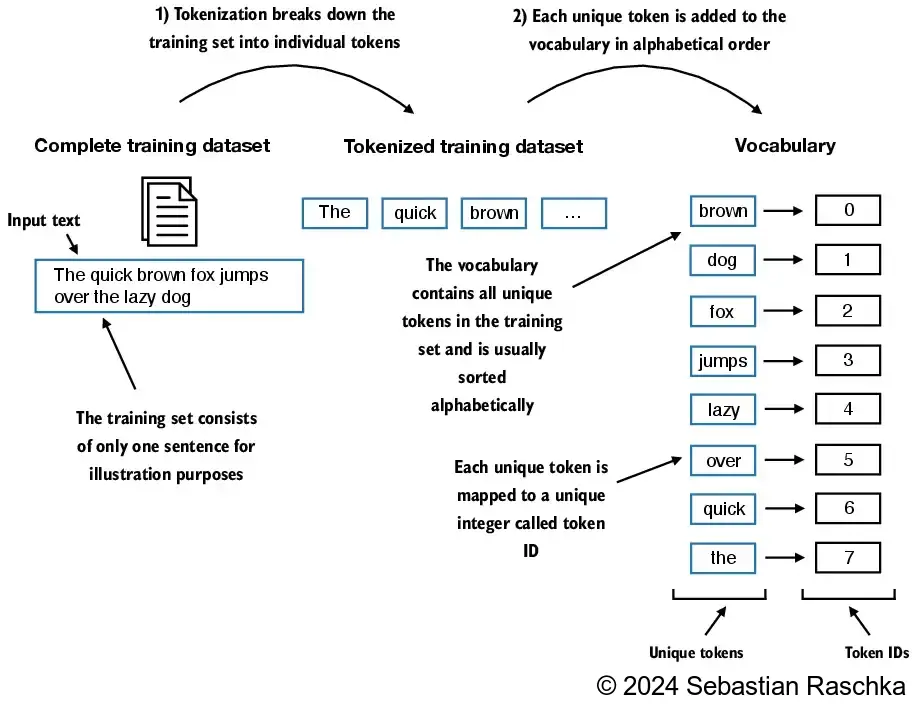

In [12]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(f"{vocab_size} unique words")

1130 unique words


In [13]:
vocab = {token:integer for integer, token in enumerate(all_words)}

In [14]:
for k,v in vocab.items():
    print(f"{k}: {v}")
    if v==30:
        break


!: 0
": 1
': 2
(: 3
): 4
,: 5
--: 6
.: 7
:: 8
;: 9
?: 10
A: 11
Ah: 12
Among: 13
And: 14
Are: 15
Arrt: 16
As: 17
At: 18
Be: 19
Begin: 20
Burlington: 21
But: 22
By: 23
Carlo: 24
Chicago: 25
Claude: 26
Come: 27
Croft: 28
Destroyed: 29
Devonshire: 30


In [15]:
# putting everything into a tokenizer class
class SimpleTokenizer_V1:
  def __init__(self,vocab):
    self.str_to_int = vocab
    self.int_to_str = {v:k for k,v in vocab.items()}

  def encode(self,text):
    preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
    preprocessed = [item.strip() for item in preprocessed if item.strip()]
    ids = [self.str_to_int[strng] for strng in preprocessed]
    return ids

  def decode(self,ids):
    text = " ".join([self.int_to_str[id] for id in ids])
    text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
    return text



In [16]:
tokenizer = SimpleTokenizer_V1(vocab)
text = """"It's the last he painted, you know,"
           Mrs. Gisburn said with pardonable pride."""

In [17]:
ids = tokenizer.encode(text)
print(ids)

[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


In [18]:
tokenizer.decode(ids)

'" It\' s the last he painted, you know," Mrs. Gisburn said with pardonable pride.'

In [19]:
# to handle unknown words and EOL
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])

vocab = {token:integer for integer,token in enumerate(all_tokens)}

In [20]:
len(vocab)

1132

In [21]:
for id,item in reversed(list(vocab.items())):
    print(f"{id}: {item}")
    if item==len(vocab)-5:
        break

<|unk|>: 1131
<|endoftext|>: 1130
yourself: 1129
your: 1128
younger: 1127


In [22]:
# addding all this to a new tokenizer
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}

    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids):
        text = " ".join([self.int_to_str[i] for i in ids])
        # Replace spaces before the specified punctuations
        text = re.sub(r'\s+([,.:;?!"()\'])', r'\1', text)
        return text

In [23]:
tokenizer = SimpleTokenizerV2(vocab)
txt1 = "Hi,i am vishnu"
tokenizer.encode(txt1)


[1131, 5, 1131, 150, 1131]

In [24]:
tokenizer.decode(tokenizer.encode(txt1))

'<|unk|>, <|unk|> am <|unk|>'

## Bytepair encoding(BPE)

In [25]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00


In [26]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

In [27]:
text = "This is a test, I am vishnu"

In [28]:
integers = tokenizer.encode(text)
print(integers)

[1212, 318, 257, 1332, 11, 314, 716, 410, 680, 28803]


In [29]:
strings = tokenizer.decode(integers)
print(strings)

This is a test, I am vishnu


## Data sampling with a sliding window

In [30]:
with open("the_verdict.txt", "r", encoding="utf-8") as f:
    r_text = f.read()
enc_text = tokenizer.encode(r_text)
print(len(enc_text))
print(enc_text[:10])

5145
[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138]


For each text chunk, we want the inputs and targets
Since we want the model to predict the next word, the targets are the inputs shifted by one position to the right

In [31]:

enc_sample =enc_text[:50]
context_size = 5
x= enc_sample[:context_size]
y= enc_sample[1:context_size+1]
print(f"x: {x}")
print(f"y:      {y}")

x: [40, 367, 2885, 1464, 1807]
y:      [367, 2885, 1464, 1807, 3619]


In [32]:
for intgr in range(1,context_size+1):
  context= enc_sample[:intgr]
  target = enc_sample[intgr]
  print(f"when input is {context} the target: {target}")

when input is [40] the target: 367
when input is [40, 367] the target: 2885
when input is [40, 367, 2885] the target: 1464
when input is [40, 367, 2885, 1464] the target: 1807
when input is [40, 367, 2885, 1464, 1807] the target: 3619


In [33]:
# decode the above one
for intgr in range(1,context_size+1):
  context= enc_sample[:intgr]
  target = enc_sample[intgr]
  print(f"when input is {tokenizer.decode(context)} the target: {tokenizer.decode([target])}")

when input is I the target:  H
when input is I H the target: AD
when input is I HAD the target:  always
when input is I HAD always the target:  thought
when input is I HAD always thought the target:  Jack


In [34]:
#data loader

In [35]:
!pip install torch torchvision -U

In [36]:
import torch
print(torch.__version__)

2.4.1+cu121


In [37]:
# data set laoder in torch
from torch.utils.data import Dataset,DataLoader
class GPTDatasetV1(Dataset):
  def __init__(self, text,tokenizer,max_length,stride):
    self.input_ids =[]
    self.target_ids = []
    # tokenize the entire text
    token_ids = tokenizer.encode(text,allowed_special={"<|endoftext|>"})

    for i in range(0,len(token_ids)-max_length,stride):
      input_chunk = token_ids[i:i+max_length]
      target_chunk = token_ids[i+1:i+max_length+1]
      self.input_ids.append(torch.tensor(input_chunk))
      self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self,idx):
    return self.input_ids[idx],self.target_ids[idx]


In [38]:
def create_dataloader_v1(txt,batch_size=4, max_length=256,stride=128,shuffle=True,drop_last=True,num_workers=0):
  tokenizer = tiktoken.get_encoding("gpt2")
  dataset = GPTDatasetV1(txt,tokenizer,max_length,stride)
  dataloader = DataLoader(dataset,batch_size=batch_size,shuffle=shuffle,drop_last=drop_last,num_workers=num_workers)
  return dataloader

In [39]:
with open("the_verdict.txt","r",encoding="utf-8") as f:
  raw_txt = f.read()


In [40]:
dataloader = create_dataloader_v1(raw_txt,batch_size=1,max_length=4,stride=1,shuffle=False)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [41]:
dataloader = create_dataloader_v1(raw_txt,batch_size=8,max_length=4,stride=4,shuffle=False)
data_iter = iter(dataloader)
inputs,targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [42]:
#creating token embeddings


In [43]:
input_ids=torch.tensor([2,3,5,1])

In [44]:
#lets create a small vocab of only 6words and we create embeddings of size 3
vocab_size = 6
output_dim = 3
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size,output_dim)
print(embedding_layer)
print(embedding_layer.weight)

Embedding(6, 3)
Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)


In [45]:
# to convert a token with id 3 into 3d vector
print(embedding_layer(torch.tensor(3)))

tensor([-0.4015,  0.9666, -1.1481], grad_fn=<EmbeddingBackward0>)


In [46]:
#to embed all 4 input ids
print(input_ids)
print(embedding_layer.weight)
print(embedding_layer(input_ids))
# so basically embedding layer is look up operation

tensor([2, 3, 5, 1])
Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
tensor([[ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-2.8400, -0.7849, -1.4096],
        [ 0.9178,  1.5810,  1.3010]], grad_fn=<EmbeddingBackward0>)


In [47]:
#encoding word positions
#position embeddings are combined with token embeddding vector to form the input embeddings

In [48]:
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size,output_dim)



    If we sample data from the dataloader, we embed the tokens in each batch into a 256-dimensional vector
    If we have a batch size of 8 with 4 tokens each, this results in a 8 x 4 x 256 tensor:



In [50]:
max_length = 4
dataloader = create_dataloader_v1(raw_txt,batch_size=8,max_length=max_length,
                                  stride=max_length,shuffle=False)
data_iter = iter(dataloader)
inputs,targets = next(data_iter)
print("Inputs:\n", inputs)
print("input shape",inputs.shape)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
input shape torch.Size([8, 4])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [54]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [52]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings.shape)



torch.Size([4, 256])


In [56]:
input_embeddings = token_embeddings + pos_embeddings
print(input_embeddings.shape)


torch.Size([8, 4, 256])
